In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

### **1. Read data**

In [16]:
df = pd.read_csv('../../data/processed/canonical_data.csv')
df.head()

,p_categories,p_brand,p_day_created,p_sold_quantity,p_original_price,p_discount_rate
0,7,155,659.0,0.041052,528000,49
1,84,198,974.0,7.554966,799000,46
2,84,192,1372.0,0.187097,209000,0
3,7,155,593.0,6.017157,473000,50
4,15,145,529.0,1.053469,106000,16


### **2. Train test split**
&#9889; This cell we choose columns X and y to split train test. Test set with size 20% and Train set with size 80% 

In [17]:
X = df.drop(['p_sold_quantity'], axis='columns')
y = testLabels = df.p_sold_quantity

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

#### Make polynomial regression by pipeline 
&#9889; **NOTE:** We use pipeline to make polynomial regression. We can use pipeline to make many steps in one cell. Inside `Polynomial regression` used to make polynomial regression. We can change degree of polynomial regression by change `degree` in `PolynomialFeatures`

In [18]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression(**kwargs))

#### Create paramater grid to use GridSearchCV

In [19]:
param_grid = {
   'polynomialfeatures__degree': [3,4,5], 
   'linearregression__fit_intercept': [True, False], 
   'linearregression__normalize': [True, False]
}

In [20]:
gr_search = GridSearchCV(PolynomialRegression(), 
                         param_grid, 
                         cv=10, 
                         scoring='neg_mean_squared_error', 
                         verbose=3) 

#### Fit grid search to find best score and best param 

In [21]:
gr_search.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-49493313401932.531 total time=   0.0s
[CV 2/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-0.436 total time=   0.0s
[CV 3/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-0.556 total time=   0.0s
[CV 4/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-1.037 total time=   0.0s
[CV 5/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-7.870 total time=   0.0s
[CV 6/10] END linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=3;, score=-1.646 total time=   0.0s
[CV 7/10] END linearregression

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': [3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=3)

In [22]:
print('Best Score: %s' % gr_search.best_score_)
print('Best Hyperparameters: %s' % gr_search.best_params_)

Best Score: -4538194736604.496
Best Hyperparameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': False, 'polynomialfeatures__degree': 3}


### **3. Train model**

In [23]:
linear_fit_intercept, linear_normalize = gr_search.best_params_.get('linearregression__fit_intercept'), gr_search.best_params_.get('linearregression__normalize')
poly_grid = PolynomialRegression(degree=3, fit_intercept=linear_fit_intercept, normalize=linear_normalize)
poly_grid.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

### **4. Predict with model**

In [24]:
y_pred = poly_grid.predict(X_test)

#### **<font color='green'>Visualize Predict and Error values</font>**

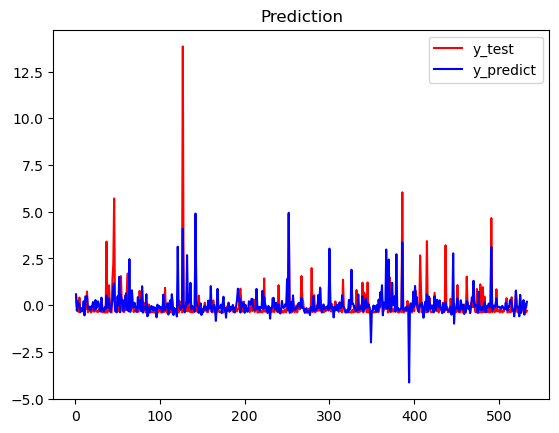

In [25]:
plot_predict = [i for i in range (1, len(y_test) + 1, 1)]
plt.plot(plot_predict,y_test,color='r',linestyle='-')
plt.plot(plot_predict,y_pred,color='b',linestyle='-')
plt.legend(['y_test','y_predict'])
plt.title('Prediction')
plt.show()

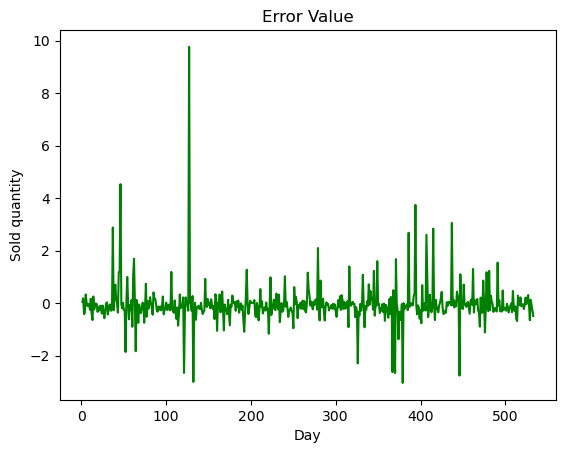

In [26]:
plot_error_value = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(plot_error_value, y_test-y_pred, color='green', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Sold quantity')
plt.title('Error Value')
plt.show()

### 5. Evaluate Linear Model with Poly nominal features

In [27]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.5976363481591647
MAE:  0.3782701648986338
RMSE:  0.7730694329484026


#### **Intecept and coeff of the model**

In [28]:
print('Intercept of the model:',gr_search.best_estimator_.named_steps['linearregression'].intercept_)
print('Coefficient of the line:',gr_search.best_estimator_.named_steps['linearregression'].coef_)

Intercept of the model: 0.10974709800205283
Coefficient of the line: [ 1.12311111e-15 -1.88942359e-01 -1.04364136e-01  1.08106970e+01
 -1.28446572e-01  5.04098116e-01 -3.02893948e-02  5.92584925e-02
 -1.07943420e+01 -7.16345128e-01 -2.75331497e-01  9.34049397e-02
 -2.35141113e-01 -8.37916506e-02  5.76105017e-02  9.17985954e+01
  1.22933941e+01  1.95969407e+01  9.99545593e-02  3.79266199e-01
  2.40234230e-01 -3.02791245e-02 -4.53272201e-02  2.86353770e-02
  2.13732414e-01 -5.01565351e-02  3.01885083e-02  1.19928783e+00
 -1.56029602e-01  1.22747505e-02 -1.03922892e+02 -1.83506103e+01
 -5.57866864e+00  1.39905183e-01 -4.65203931e-01 -2.99693008e-02
  5.36740965e-02  2.33605628e-01 -8.04562313e-02 -5.76951705e-02
 -1.85230809e+00  2.35688040e+00  2.00623145e+00  1.39005022e-01
  1.91316931e-01  1.41505845e-02  7.18549348e+00  1.26313862e+02
  2.58534635e+02  2.78568970e+00  8.14917905e+00  6.05048394e+00
  1.25895919e-03  5.54289887e-02  9.90613252e-02  1.26890937e-02]
